In [1]:
#!pip install pycaret --user

In [2]:
from pycaret.classification import *

In [3]:
from sklearn import datasets
import datetime
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold

from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

#from pycaret.classification import *
from pycaret.clustering import *


pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

%matplotlib inline

In [4]:
data = pd.read_csv('C:/Users/ganes/Downloads/archive (3)/marketing_campaign.csv',delimiter='\t')

data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0      5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1      2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0
2      4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0
3      6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0
4      5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0
...     ...         ...         ...            ...      ...      ...       ...         ...      ...       ...        ...              ...              ...               ...           ...                ...              ...                  ...                ...                ...           ...           ...           ...           ...           ...       ...            ...        ...       ...
2235  10870        1967  Graduation        Married  61223.0        0         1  13-06-2013       46       709         43              182               42               118           247                  2                9                    3                  4                  5             0             0             0             0             0         0              3         11         0
2236   4001        1946         PhD       Together  64014.0        2         1  10-06-2014       56       406          0               30                0                 0             8                  7                8                    2                  5                  7             0             0             0             1             0         0              3         11         0
2237   7270        1981  Graduation       Divorced  56981.0        0         0  25-01-2014       91       908         48              217               32                12            24                  1                2                    3                 13                  6             0             1             0             0             0         0              3         11         0
2238   8235        1956      

In [5]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue     Response
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000      2240.000000       2240.000000   2240.000000        2240.000000      2240.000000          2240.000000        2240.000000        2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000  2240.000000         2240.0     2240.0  2240.000000
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250    49.109375   303.935714    26.302232       166.950000        37.525446         27.062946     44.021875           2.325000         4.084821             2.662054           5.790179           5.316518      0.072768      0.074554      0.072768      0.064286      0.013393     0.009375            3.0       11.0     0.149107
std     3246.662198    11.984069   25173.076661     0.538398     0.544538    28.962453   336.597393    39.773434       225.715373        54.628979         41.280498     52.167439           1.932238         2.778714             2.923101           3.250958           2.426645      0.259813      0.262728      0.259813      0.245316      0.114976     0.096391            0.0        0.0     0.356274
min        0.000000  1893.000000    1730.000000     0.000000     0.000000     0.000000     0.000000     0.000000         0.000000         0.000000          0.000000      0.000000           0.000000         0.000000             0.000000           0.000000           0.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000            3.0       11.0     0.000000
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000    24.000000    23.750000     1.000000        16.000000         3.000000          1.000000      9.000000           1.000000         2.000000             0.000000           3.000000           3.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000            3.0       11.0     0.000000
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000    49.000000   173.500000     8.000000        67.000000        12.000000          8.000000     24.000000           2.000000         4.000000             2.000000           5.000000           6.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000            3.0       11.0     0.000000
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000    74.000000   504.250000    33.000000       232.000000        50.000000         33.000000     56.000000           3.000000         6.000000             4.000000           8.000000           7.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000            3.0       11.0     0.000000
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000    99.000000  1493.000000   199.000000      1725.000000       259.000000        263.000000    362.000000          15.000000        27.000000            28.000000          13.000000          20.000000      1.000000      1.000000      1.000000      1.000000      1.000000     1.000000            3.0       11.0     1.000000

In [6]:
data.describe().T

count          mean           std     min       25%      50%       75%       max
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   5458.5   8427.75   11191.0
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   1970.0   1977.00    1996.0
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00  51381.5  68522.00  666666.0
Kidhome              2240.0      0.444196      0.538398     0.0      0.00      0.0      1.00       2.0
Teenhome             2240.0      0.506250      0.544538     0.0      0.00      0.0      1.00       2.0
Recency              2240.0     49.109375     28.962453     0.0     24.00     49.0     74.00      99.0
MntWines             2240.0    303.935714    336.597393     0.0     23.75    173.5    504.25    1493.0
MntFruits            2240.0     26.302232     39.773434     0.0      1.00      8.0     33.00     199.0
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00     67.0    232.00    1725.0
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00     12.0     50.00     259.0
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00      8.0     33.00     263.0
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00     24.0     56.00     362.0
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00      2.0      3.00      15.0
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00      4.0      6.00      27.0
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00      2.0      4.00      28.0
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00      5.0      8.00      13.0
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00      6.0      7.00      20.0
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00      0.0      0.00       1.0
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00      0.0      0.00       1.0
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00      0.0      0.00       1.0
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00      0.0      0.00       1.0
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00      0.0      0.00       1.0
Complain             2240.0      0.009375      0.096391     0.0      0.00      0.0      0.00       1.0
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00      3.0      3.00       3.0
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00     11.0     11.00      11.0
Response             2240.0      0.149107      0.356274     0.0      0.00      0.0      0.00       1.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
#Spending variable creation
data['Age']=2014-data['Year_Birth']

data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [9]:
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Spending
0      5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58    635      88   546   172      88    88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1   57      1617
1      2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38     11       1     6     2       1     6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0   60        27
2      4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26    426      49   127   111      21    42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0   49       776
3      6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26     11       4    20    10       3     5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0   30        53
4      5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94    173      43   118    46      27    15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0   33       422
...     ...         ...         ...            ...      ...      ...       ...         ...      ...    ...     ...   ...   ...     ...   ...                ...              ...                  ...                ...                ...           ...           ...           ...           ...           ...       ...            ...        ...       ...  ...       ...
2235  10870        1967  Graduation        Married  61223.0        0         1  13-06-2013       46    709      43   182    42     118   247                  2                9                    3                  4                  5             0             0             0             0             0         0              3         11         0   47      1341
2236   4001        1946         PhD       Together  64014.0        2         1  10-06-2014       56    406       0    30     0       0     8                  7                8                    2                  5                  7             0             0             0             1             0         0              3         11         0   68       444
2237   7270        1981  Graduation       Divorced  56981.0        0         0  25-01-2014       91    908      48   217    32      12    24                  1                2                    3                 13                  6             0             1             0             0             0         0              3         11         0   33      1241
2238   8235        1956      Master       Together  69245.0        0         1  24-01-2014        8    428      30   214    80      30    61                  2                6                    5                 10                  3             0             0             0             0             0         0              3         

In [10]:
data1=data[['Age','Education','Marital_Status','Income','Spending','Wines','Fruits','Meat','Fish','Sweets','Gold']]
data1.head()

Age   Education Marital_Status   Income  Spending  Wines  Fruits  Meat  Fish  Sweets  Gold
0   57  Graduation         Single  58138.0      1617    635      88   546   172      88    88
1   60  Graduation         Single  46344.0        27     11       1     6     2       1     6
2   49  Graduation       Together  71613.0       776    426      49   127   111      21    42
3   30  Graduation       Together  26646.0        53     11       4    20    10       3     5
4   33         PhD        Married  58293.0       422    173      43   118    46      27    15

In [11]:
X=data1.iloc[:,3:]
X.head()

Income  Spending  Wines  Fruits  Meat  Fish  Sweets  Gold
0  58138.0      1617    635      88   546   172      88    88
1  46344.0        27     11       1     6     2       1     6
2  71613.0       776    426      49   127   111      21    42
3  26646.0        53     11       4    20    10       3     5
4  58293.0       422    173      43   118    46      27    15

In [12]:
X['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [13]:
X['Income']=X['Income'].fillna(52247.2)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    2240 non-null   float64
 1   Spending  2240 non-null   int64  
 2   Wines     2240 non-null   int64  
 3   Fruits    2240 non-null   int64  
 4   Meat      2240 non-null   int64  
 5   Fish      2240 non-null   int64  
 6   Sweets    2240 non-null   int64  
 7   Gold      2240 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 140.1 KB


In [15]:
data1=X.sample(frac=1).reset_index(drop=True)

In [16]:
scores=[]
for k in range(2,10):
    model=KMeans(n_clusters=k,random_state=0).fit(data1)
    scores.append(silhouette_score(data1,model.labels_))

In [17]:
import plotly_express as px
px.line(y=scores,x=range(2,10),title='Silhouette Score for each K',labels={
    'x':'Values of K',
    'y':'silhouette_score'
})

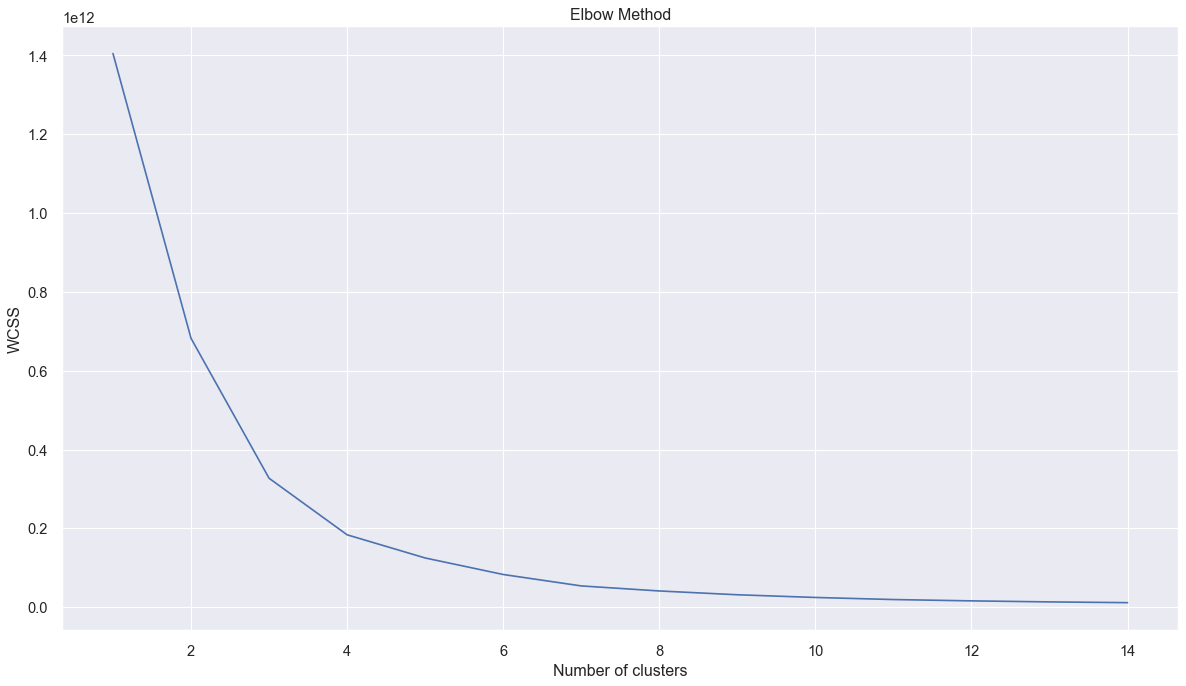

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(18,10), dpi=80)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

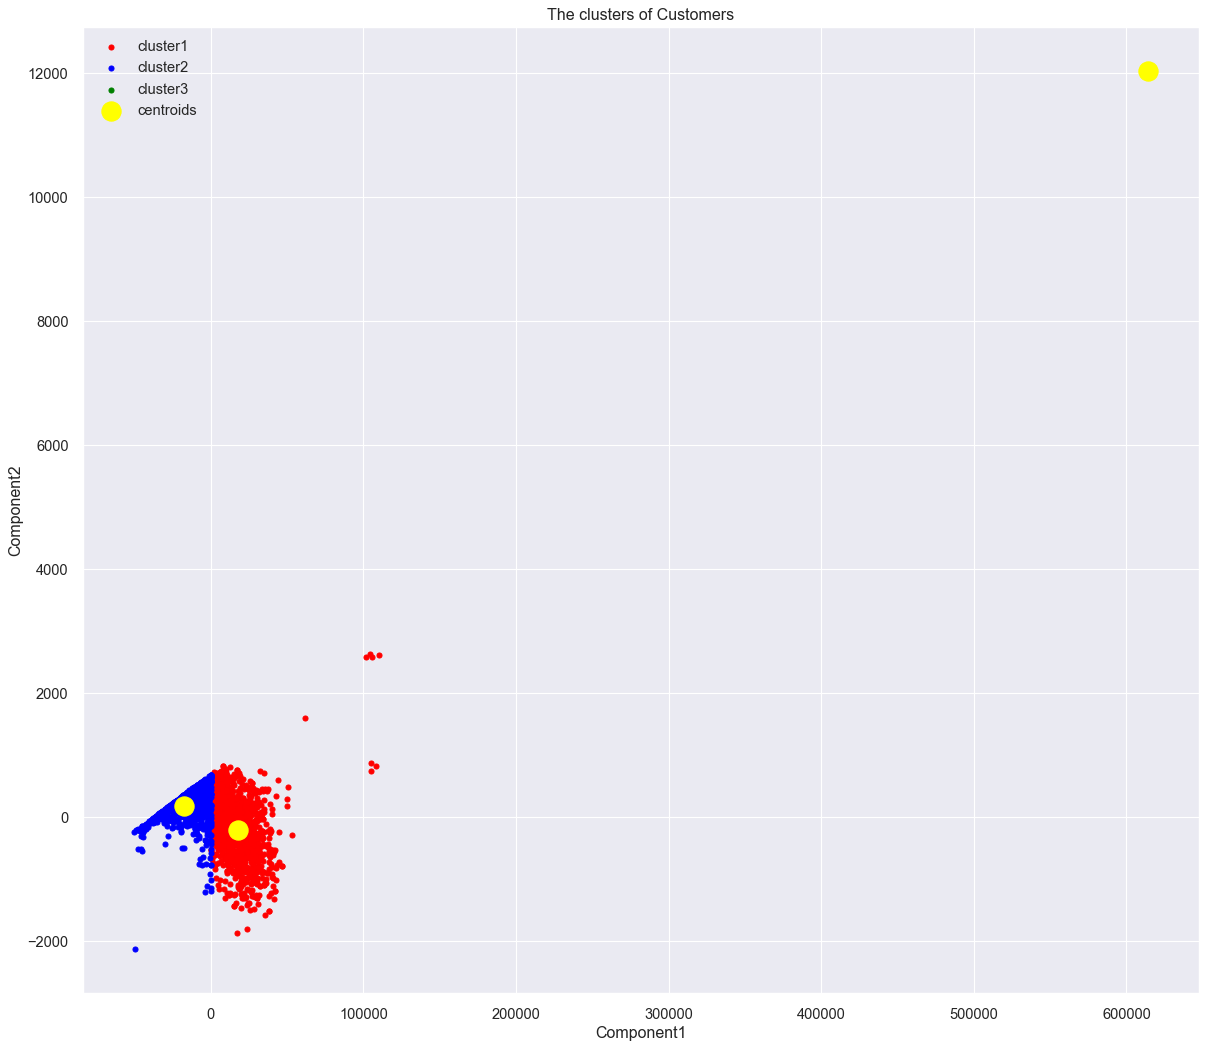

In [21]:
plt.figure(figsize=(18,16), dpi=80)
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label='cluster1')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label='cluster2')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label='cluster3')
#plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label='cluster4')
#plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans == 4, 1], s = 100, c = 'gray', label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.title('The clusters of Customers')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.legend()

plt.show()


# Data Visualization

In [22]:
K=3
model=KMeans(n_clusters=K,random_state=0).fit(data1)
data1['Cluster']=model.labels_
centers=model.cluster_centers_

In [23]:
fig=px.pie(values=data1['Cluster'].value_counts(),names=['Cluster 1', 'Cluster 2','Cluster3'],title='Number of people per Cluster')
fig.update_traces(
    textinfo='percent+value+label'
)
fig.show()

In [24]:
df = pd.DataFrame({'Cluster':data1['Cluster'],
                   'Spending':data1['Wines']+data1['Fruits']+data1['Meat']+data1['Fish']+data1['Sweets']+data1['Gold']})

In [25]:
px.scatter(df,y='Spending',color='Cluster',trendline='lowess',title='Total Spending',marginal_y='box')

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [27]:
tdf=pd.DataFrame({
    'Fruits':data1['Fruits'],
    'Gold':data1['Gold'],
    'Meat':data1['Meat'],
    'Wines':data1['Wines'],
    'Fish':data1['Fish'],
    'Sweets':data1['Sweets'],
    'Spending':data1['Fruits']+data1['Gold']+data1['Fish']+data1['Meat']+data1['Wines']+data1['Sweets'],
    'Cluster':data1['Cluster']
})


specs = [[{'type':'domain'}, {'type':'domain'}], 
         [{'type':'domain'}, {'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'}]
        ]

fig = make_subplots(rows=3, cols=2, specs=specs,subplot_titles=['Fruits', 'Gold','Meat','Wines','Fish','Sweets'])


fig.add_trace(go.Pie(values=tdf['Fruits'],labels=tdf['Cluster']),1,1)
fig.add_trace(go.Pie(values=tdf['Gold'],labels=tdf['Cluster']),1,2)
fig.add_trace(go.Pie(values=tdf['Meat'],labels=tdf['Cluster']),2,1)
fig.add_trace(go.Pie(values=tdf['Wines'],labels=tdf['Cluster']),2,2)
fig.add_trace(go.Pie(values=tdf['Fish'],labels=tdf['Cluster']),3,1)
fig.add_trace(go.Pie(values=tdf['Sweets'],labels=tdf['Cluster']),3,2)

fig = go.Figure(fig)
fig.show()

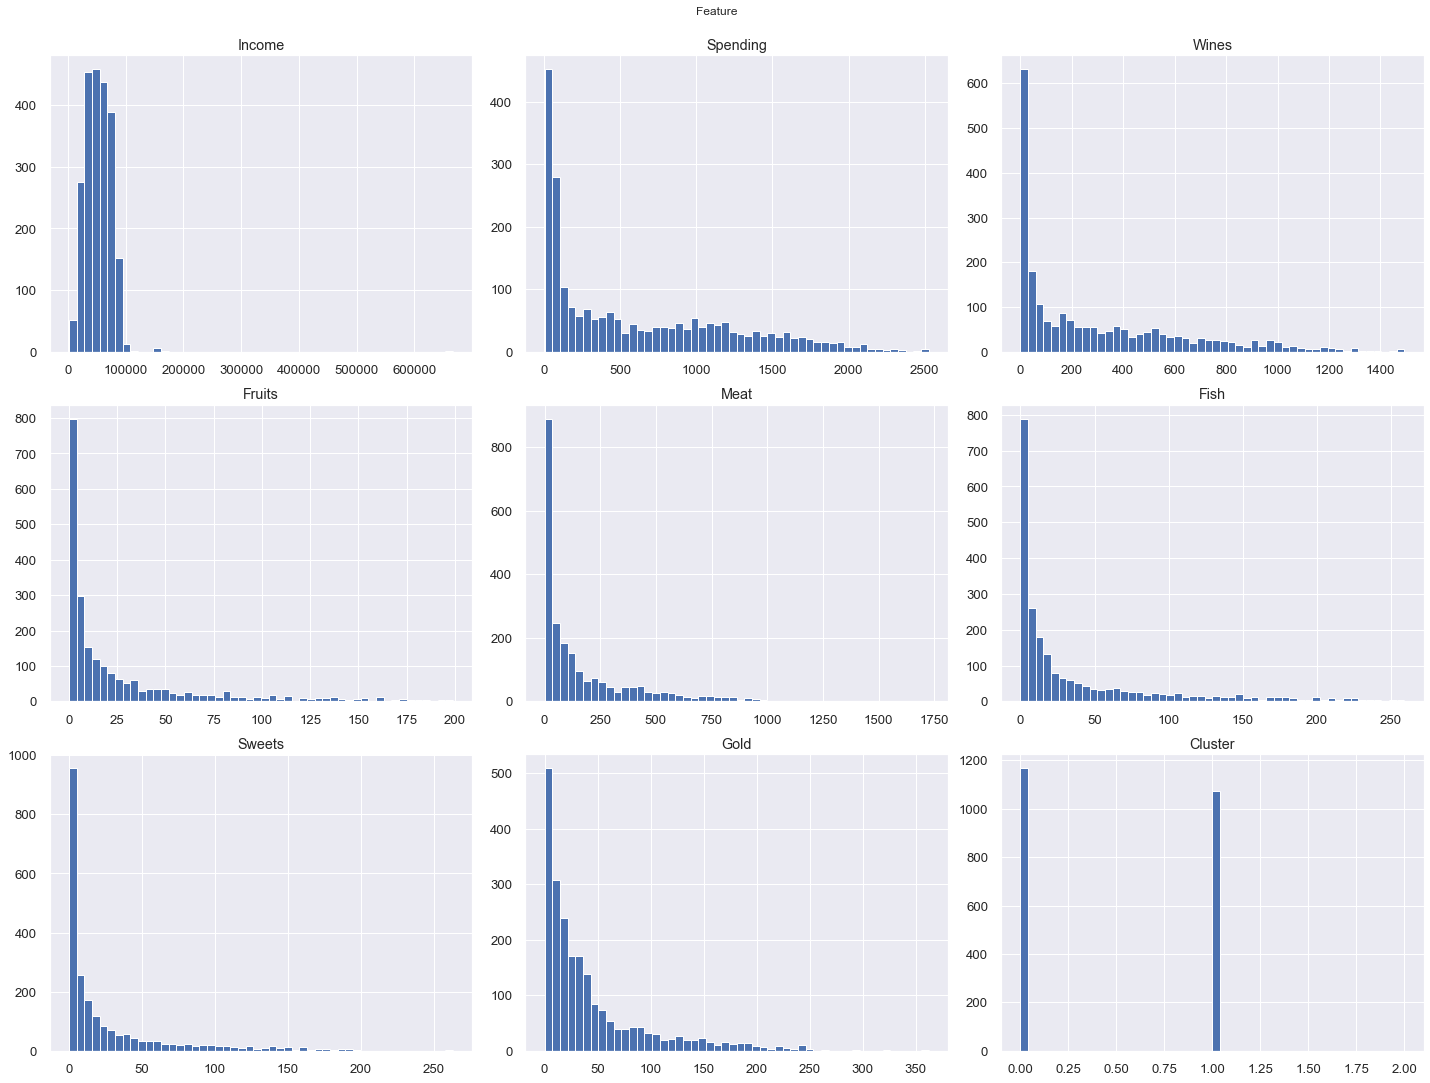

In [28]:
data1.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature' , x=0.5, y=1.00, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [29]:
fig=px.scatter_3d(data1,x='Meat',y='Gold',z='Wines',color='Spending',color_continuous_scale='teal')
fig.update_layout(
    title={
        'text': 'Meat vs. Gold vs. Wines for Different Type of product Spending',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# T : 1 Ans
---
1. **In Cluster1, less number of people spend on Meat, while most spend on Gold.**
2. **In Cluster2, less number of people spend on Gold, while most spend on Meat.**
3. **In Cluster3, there is a outlaier.** 

Group 1 is the less spending one & Group 2 is the more spending one
It is surpising to see that both trends are completely opposite.
Cluster2 also does 86% of the spending.

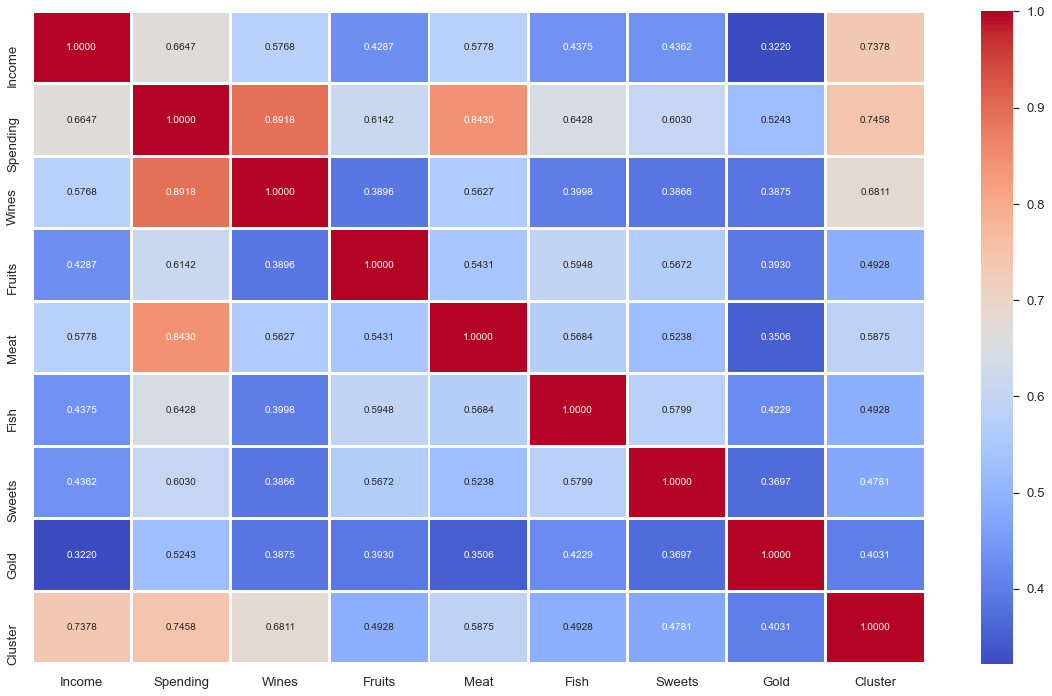

In [30]:
#Correlation
plt.figure(figsize=(20,12))
sns.heatmap(data1.corr(),cmap="coolwarm",annot=True,fmt='.4f',linewidths=2)
plt.show()

**Train Test Split**

In [31]:
X = data.iloc[:,0:]
y = data.iloc[:,5]

In [32]:
X

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Spending
0      5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58    635      88   546   172      88    88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1   57      1617
1      2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38     11       1     6     2       1     6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0   60        27
2      4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26    426      49   127   111      21    42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0   49       776
3      6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26     11       4    20    10       3     5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0   30        53
4      5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94    173      43   118    46      27    15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0   33       422
...     ...         ...         ...            ...      ...      ...       ...         ...      ...    ...     ...   ...   ...     ...   ...                ...              ...                  ...                ...                ...           ...           ...           ...           ...           ...       ...            ...        ...       ...  ...       ...
2235  10870        1967  Graduation        Married  61223.0        0         1  13-06-2013       46    709      43   182    42     118   247                  2                9                    3                  4                  5             0             0             0             0             0         0              3         11         0   47      1341
2236   4001        1946         PhD       Together  64014.0        2         1  10-06-2014       56    406       0    30     0       0     8                  7                8                    2                  5                  7             0             0             0             1             0         0              3         11         0   68       444
2237   7270        1981  Graduation       Divorced  56981.0        0         0  25-01-2014       91    908      48   217    32      12    24                  1                2                    3                 13                  6             0             1             0             0             0         0              3         11         0   33      1241
2238   8235        1956      Master       Together  69245.0        0         1  24-01-2014        8    428      30   214    80      30    61                  2                6                    5                 10                  3             0             0             0             0             0         0              3         

In [33]:
y

0       0
1       1
2       0
3       1
4       1
       ..
2235    0
2236    2
2237    0
2238    0
2239    1
Name: Kidhome, Length: 2240, dtype: int64

In [34]:
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Spending
0      5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58    635      88   546   172      88    88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1   57      1617
1      2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38     11       1     6     2       1     6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0   60        27
2      4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26    426      49   127   111      21    42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0   49       776
3      6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26     11       4    20    10       3     5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0   30        53
4      5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94    173      43   118    46      27    15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0   33       422
...     ...         ...         ...            ...      ...      ...       ...         ...      ...    ...     ...   ...   ...     ...   ...                ...              ...                  ...                ...                ...           ...           ...           ...           ...           ...       ...            ...        ...       ...  ...       ...
2235  10870        1967  Graduation        Married  61223.0        0         1  13-06-2013       46    709      43   182    42     118   247                  2                9                    3                  4                  5             0             0             0             0             0         0              3         11         0   47      1341
2236   4001        1946         PhD       Together  64014.0        2         1  10-06-2014       56    406       0    30     0       0     8                  7                8                    2                  5                  7             0             0             0             1             0         0              3         11         0   68       444
2237   7270        1981  Graduation       Divorced  56981.0        0         0  25-01-2014       91    908      48   217    32      12    24                  1                2                    3                 13                  6             0             1             0             0             0         0              3         11         0   33      1241
2238   8235        1956      Master       Together  69245.0        0         1  24-01-2014        8    428      30   214    80      30    61                  2                6                    5                 10                  3             0             0             0             0             0         0              3         

# Train Test Split

In [35]:
X = data.iloc[:,20:25]
y = data.iloc[:,28]

In [36]:
X

AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2
0                0             0             0             0             0
1                0             0             0             0             0
2                0             0             0             0             0
3                0             0             0             0             0
4                0             0             0             0             0
...            ...           ...           ...           ...           ...
2235             0             0             0             0             0
2236             0             0             0             1             0
2237             0             1             0             0             0
2238             0             0             0             0             0
2239             0             0             0             0             0

[2240 rows x 5 columns]

In [37]:
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [38]:
data.shape

(2240, 31)

# Imbalance Data

In [39]:
y.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [40]:
na = RandomUnderSampler(sampling_strategy='majority',random_state=0)

In [41]:
new_X, new_y = na.fit_resample(X, y)

In [42]:
new_y.value_counts()

1    334
0    334
Name: Response, dtype: int64

In [43]:
new_X

AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2
0               0             0             0             0             0
1               0             0             0             0             0
2               0             0             0             0             0
3               0             0             0             0             0
4               0             0             0             0             0
..            ...           ...           ...           ...           ...
663             1             0             0             0             0
664             1             0             0             0             0
665             0             0             0             0             0
666             0             1             1             0             0
667             0             0             0             0             0

[668 rows x 5 columns]

# balanced classes

In [44]:
new_X.values, new_y.values

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        

In [45]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(new_X.values, new_y.values, test_size=0.2, random_state=0)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((534, 5), (134, 5), (534,), (134,))

# Feature Scaling

In [47]:
X_train

array([[0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int64)

In [48]:
scaler = StandardScaler()

In [49]:
X_train_scaled = scaler.fit_transform(X_train)

In [50]:
X_test_scaled = scaler.transform(X_test)

In [51]:
X_train_scaled

array([[-0.38199836, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [ 2.61781229, -0.36572936,  2.45485555,  2.64010402, -0.19207604],
       [-0.38199836, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       ...,
       [-0.38199836, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [ 2.61781229, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [-0.38199836, -0.36572936, -0.40735594, -0.37877295, -0.19207604]])

In [52]:
X_test_scaled

array([[ 2.61781229, -0.36572936,  2.45485555,  2.64010402,  5.20627152],
       [-0.38199836, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [-0.38199836, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [-0.38199836, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [-0.38199836, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [-0.38199836, -0.36572936,  2.45485555,  2.64010402, -0.19207604],
       [ 2.61781229, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [-0.38199836, -0.36572936, -0.40735594,  2.64010402, -0.19207604],
       [ 2.61781229, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [ 2.61781229, -0.36572936, -0.40735594, -0.37877295, -0.19207604],
       [-0.38199836,  2.73426233, -0.40735594, -0.37877295, -0.19207604],
       [-0.38199836, -0.36572936, -0.40735594,  2.64010402, -0.19207604],
       [-0.38199836,  2.73426233,  2.45485555,  2.64010402, -0.19207604],
       [ 2.61781229, -0.36572936, -0.4

# Model Training

In [53]:
#from pycaret.regression import *
from pycaret.clustering import *
#from sklearn.impute import SimpleImputer 
from pycaret.classification import *

In [54]:
data = data.drop(['Dt_Customer'],1)

In [55]:
exp = setup(data = data, target = 'Response', session_id=0, normalize=True, train_size=0.8,imputation_type='iterative') 

In [56]:
 best_model = compare_models()

In [57]:
models()

Name                                          Reference  Turbo
ID                                                                                                 
lr                    Logistic Regression  sklearn.linear_model._logistic.LogisticRegression   True
knn                K Neighbors Classifier  sklearn.neighbors._classification.KNeighborsCl...   True
nb                            Naive Bayes                     sklearn.naive_bayes.GaussianNB   True
dt               Decision Tree Classifier       sklearn.tree._classes.DecisionTreeClassifier   True
svm                   SVM - Linear Kernel  sklearn.linear_model._stochastic_gradient.SGDC...   True
rbfsvm                SVM - Radial Kernel                           sklearn.svm._classes.SVC  False
gpc           Gaussian Process Classifier  sklearn.gaussian_process._gpc.GaussianProcessC...  False
mlp                        MLP Classifier  sklearn.neural_network._multilayer_perceptron....  False
ridge                    Ridge Classifier        sklearn.linear_model._ridge.RidgeClassifier   True
rf               Random Forest Classifier    sklearn.ensemble._forest.RandomForestClassifier   True
qda       Quadratic Discriminant Analysis  sklearn.discriminant_analysis.QuadraticDiscrim...   True
ada                  Ada Boost Classifier  sklearn.ensemble._weight_boosting.AdaBoostClas...   True
gbc          Gradient Boosting Classifier    sklearn.ensemble._gb.GradientBoostingClassifier   True
lda          Linear Discriminant Analysis  sklearn.discriminant_analysis.LinearDiscrimina...   True
et                 Extra Trees Classifier      sklearn.ensemble._forest.ExtraTreesClassifier   True
xgboost         Extreme Gradient Boosting                      xgboost.sklearn.XGBClassifier   True
lightgbm  Light Gradient Boosting Machine                    lightgbm.sklearn.LGBMClassifier   True
catboost              CatBoost Classifier                   catboost.core.CatBoostClassifier   True

In [58]:
compare = compare_models(exclude=['catboost','lightgbm','lda','qda','mlp','nb','ridge'],fold=5)

In [59]:
xgboost = create_model('xgboost', fold = 5)

In [60]:
print(xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)


In [61]:
tuned_xgboost = tune_model(xgboost, optimize='F1', fold=5)

In [62]:
print(tuned_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.05,
              reg_lambda=5, scale_pos_weight=31.900000000000006, subsample=0.7,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)


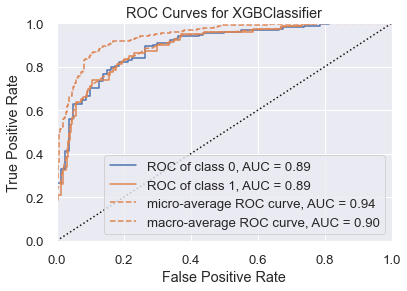

In [63]:
# AUC-ROC plot
# plot_model(tuned_rf) (or) plot_model(tuned_rf, plot = 'auc') --> both gives same result
plot_model(tuned_xgboost, plot = 'auc')

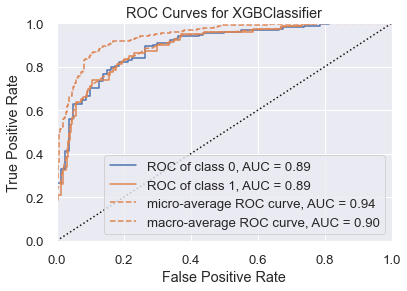

In [64]:
plot_model(tuned_xgboost)

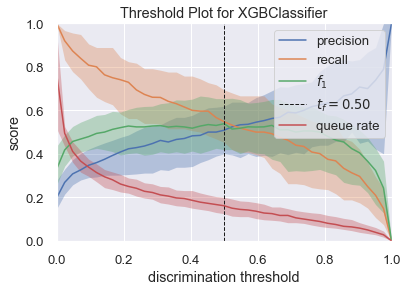

In [65]:
plot_model(tuned_xgboost, plot='threshold')

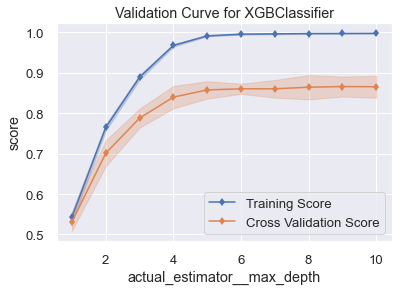

In [66]:
# Validation Curve
plot_model(tuned_xgboost, plot='vc')

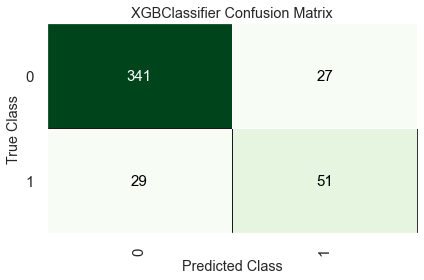

In [67]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

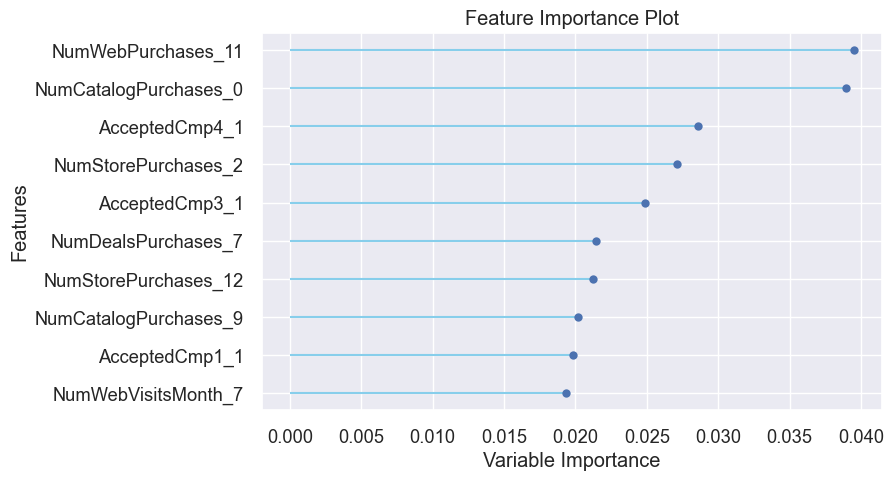

In [68]:
plot_model(tuned_xgboost, plot='feature')

# Evaluate our Model

In [69]:
# evaluate model
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpret Model

In [70]:
xgboost = create_model('xgboost')

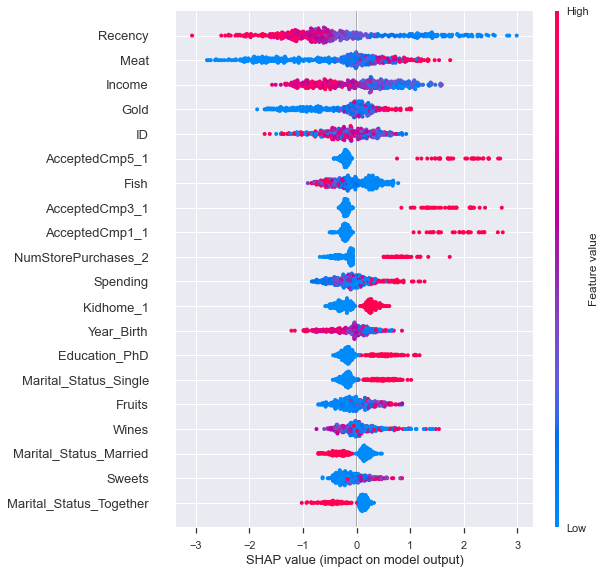

In [71]:
# interpret_model: SHAP
interpret_model(xgboost)

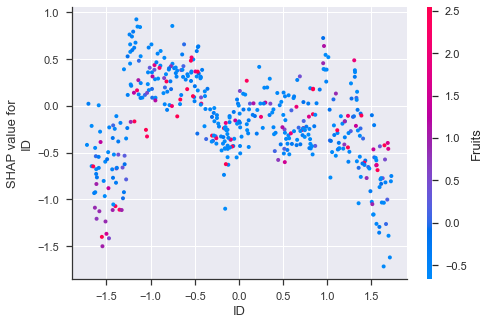

In [72]:
# interpret model : Correlation
interpret_model(xgboost, plot='correlation')

In [73]:
interpret_model(xgboost, plot='reason', observation=0)

In [74]:
interpret_model(xgboost, plot='reason', observation=2)

In [75]:
interpret_model(xgboost, plot='reason')

# Using XGBoost (Scikit-Learn) Using RandomSearchCV

In [76]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [77]:
parameters = {'max_depth': np.arange(3,10,1),
              'eta': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }

In [78]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring='f1')

In [79]:
randm.fit(new_X,new_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'min_child_weight': array([1, 2, 3]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800,

In [80]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.2, gamma=8,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=7,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.0,
              reg_lambda=0.1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

# score

In [81]:
score = randm.best_score_

In [82]:
final_score = score * 100
print('Score : \n', final_score,'%')

Score : 
 64.55002512341962 %


# T : 2 Ans
---
 * **On the promotion done by the company. Run SHAP analysis on the model results, and my recommendation to business for the next round of campaigns is Gold** .
 * **Acording to shap distribution we should focuse on Gold campaigns.**